# Data Science Project: Planning Stage (Individual)

In [58]:
library(tidyverse)
library(tidymodels)

In [59]:
url="https://drive.google.com/uc?export=download&id=1d4imNOv2XS42tWQByBcPqxOgCCyneuma"
players <- read_csv(url)
head(players)
url="https://drive.google.com/uc?export=download&id=1kKbfHH5pEfJ8z-4PrGl3gPRNQHwG4uGL"
sessions <- read_csv(url)
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


## 1.Data Description:

### Players.csv

In [60]:
summary(players)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

On this file, the number of obervation is **196**.

##### **-The Summary of Statistic**

**played_hours**: **Min**:0.000, **Median**:0.100, **Mean**: 5.846, **Max**: 223.100

**Age**: **Min**:9.00, **Median**:19.00, **Mean**:21.14, **Max**:58.00

**subscribe**: **FALSE**:52, **TRUE**:144

**-Varibles**

There are 7 variables in this file.  
1.**experience**:Categorical (*The player's experience of playing Minecarft*)  
2.**subscribe**:Categorical (*Whether the player subscribled to the newsletter*)  
3.**hashedEmail**:Categorical (*Email of the player*)  
4.**played_hours**:Numerical  (*Number of housrs the players played on the server*)   
5.**name**:Categorical (*Names of players*)  
6.**gender**:Categorical (*Genders of the players*)  
7.**Age**:Numerical (*Ages of the players*)  

### Sessions.csv

In [61]:
summary(sessions)

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

On this file, the number of obervation is **196**.

##### **-The Summary of Statistic**

**original_start_time**:**Min**:1.712e+12, **Median**:1.719e+12, **Mean**:1.719e+12, **Max**:1.727e+12

**original_end_time**:**Min**:1.712e+12, **Median**:1.719e+12, **Mean**:1.719e+12, **Max**:1.727e+12

**-Varibles**

There are 5 variables in this file.  
1.**hashedEmail**:Categorical (*The player's e-mail*)  
2.**start_time**:Categorical (*Players' start time*)  
3.**end_time**:Categorical (*Players' end time*)  
4.**original_start_time**:Numerical  (*start_time in numerical*)   
5.**original_end_time**:Numerical (*end_time in numerical*)  

### Issues

In the players.csv, the player_hours variable have some issues which could indeuce bias.  
The value of minimum player_hours is 0. This means one or more player only registered the game but did not make any action in the game. In this situation, this bias data in model would affect the model making it performe not well.  
Also the value of median player_hours is 0.1. This number is too small in the data, which means that most of the participants only played a small amount of time. It could not help the model and could mislead the model in a negative way.

## 2.Question

**Broad Question:** What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?  
**Specific Question:** “Can player demographics and in-game behaviour predict whether a Minecraft research player subscribes to the newsletter?”  

### -How Data Can Support

The players.csv file contains demographic information for each player (age, gender, experience level, and self-reported playtime). The sessions.csv file records individual gaming sessions. I plan to use variables from these two files as predictor variables to attempt predicting whether players will subscribe to the newsletter.



### -Data Wrangling

Both players.csv and sessions.csv contain tidy data. Therefore, I believe no further processing is required. These datasets are ready for immediate use. However, there are some biased information in the players.csv file. To avoid those bias information affect the accuracy of the model, revomving thoese players with no participation or pretty low participation is needed.

In [62]:
effective_players <- filter(players, played_hours >0)
effective_players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47
Veteran,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23
Beginner,TRUE,4bed6f49b672974f706aa7f020b4f29020326bf594520593557cd381a51559b8,1.5,Sarah,Female,25
Amateur,TRUE,3caa832978e0596779f4ee7c686c4592fb6de893925025d25bf26be9a8cd03f5,0.2,Thatcher,Male,22
Amateur,TRUE,a175d4741dc84e6baf77901f6e8e0a06f54809a34e6b5211159bced346f7fb3e,48.4,Xander,Female,17


## 3.Visualization

The first visualization is grouped by the gender. This graph aims to analysis the relationship with subscription and gender.

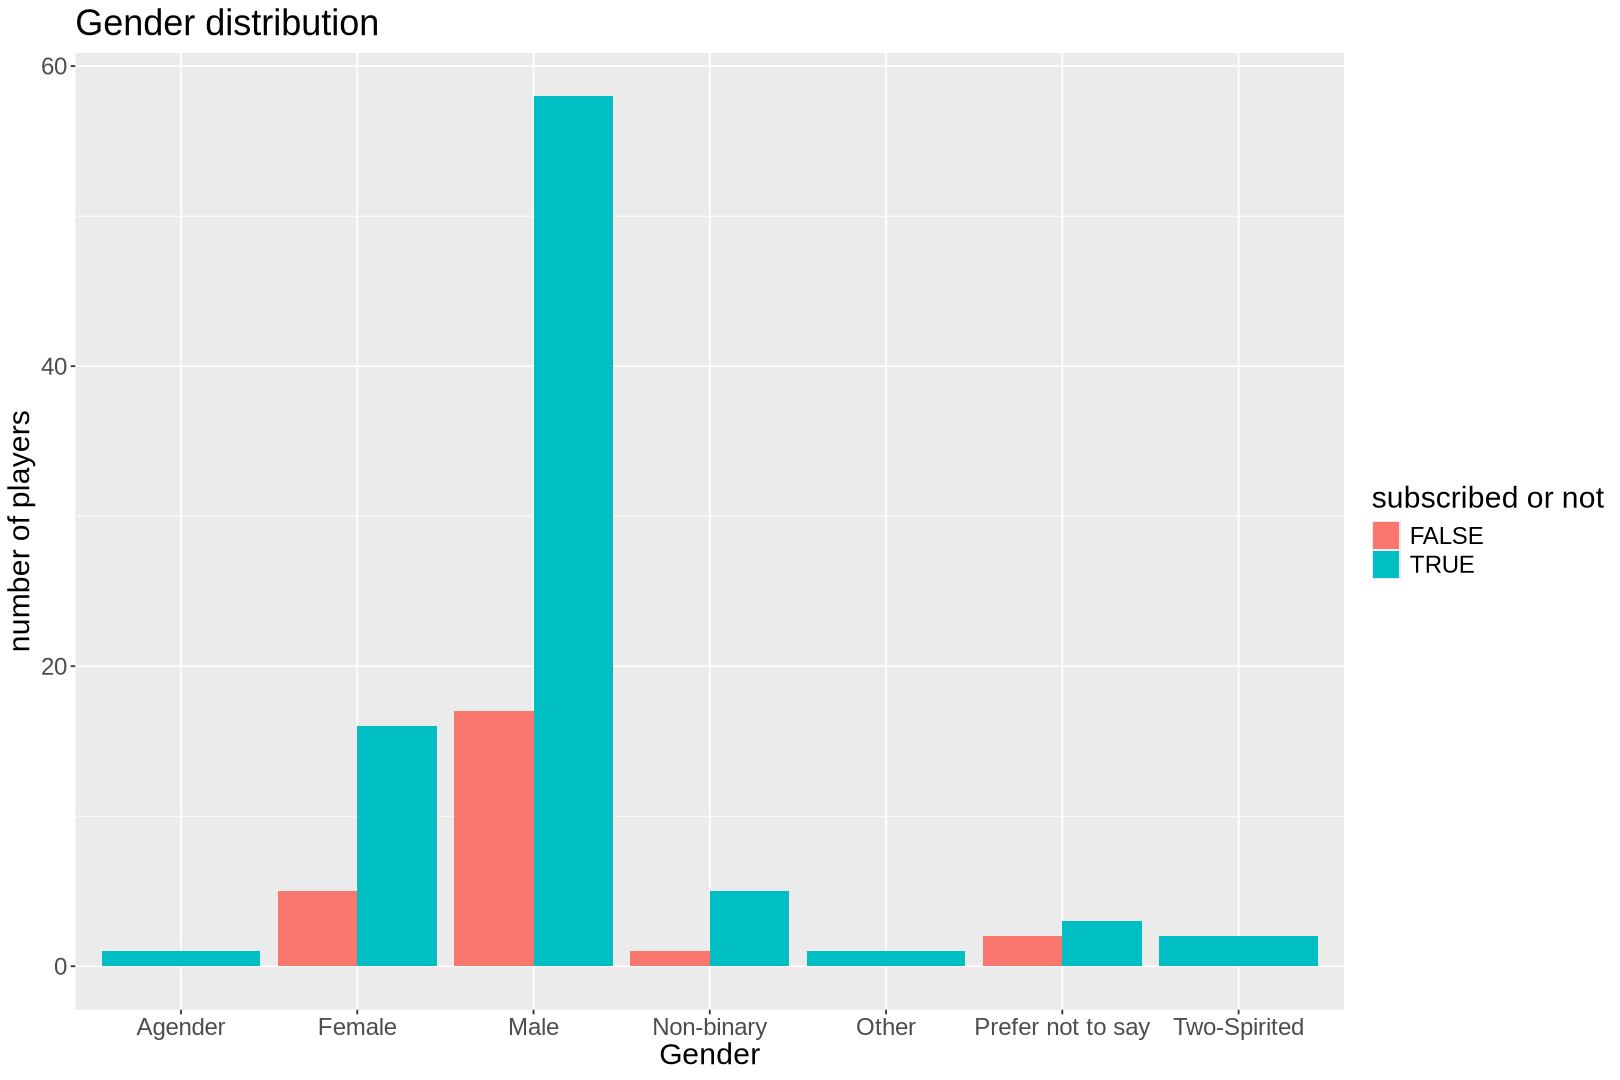

In [63]:
options(repr.plot.height = 9, repr.plot.width = 13.5)
gender_dis <- effective_players |>
ggplot(aes(x = gender, fill = subscribe))+
geom_bar(position="dodge") +
labs(x="Gender", y="number of players", fill= "subscribed or not", title="Gender distribution")+
theme(text=element_text(size=18))
gender_dis

The second visualization is grouped by the ages. This graph aims to analysis the relationship with subscription and ages.

In [64]:
players_age <- mutate(effective_players, age_group = cut(Age, breaks=c(5,10,15,20,25,30,35,40,45,50,55,60),
        labels = c("5~10","11~15","16~20","21~25","26~30","31~35","36~40","41~45","46~50","51~55","56~60")))

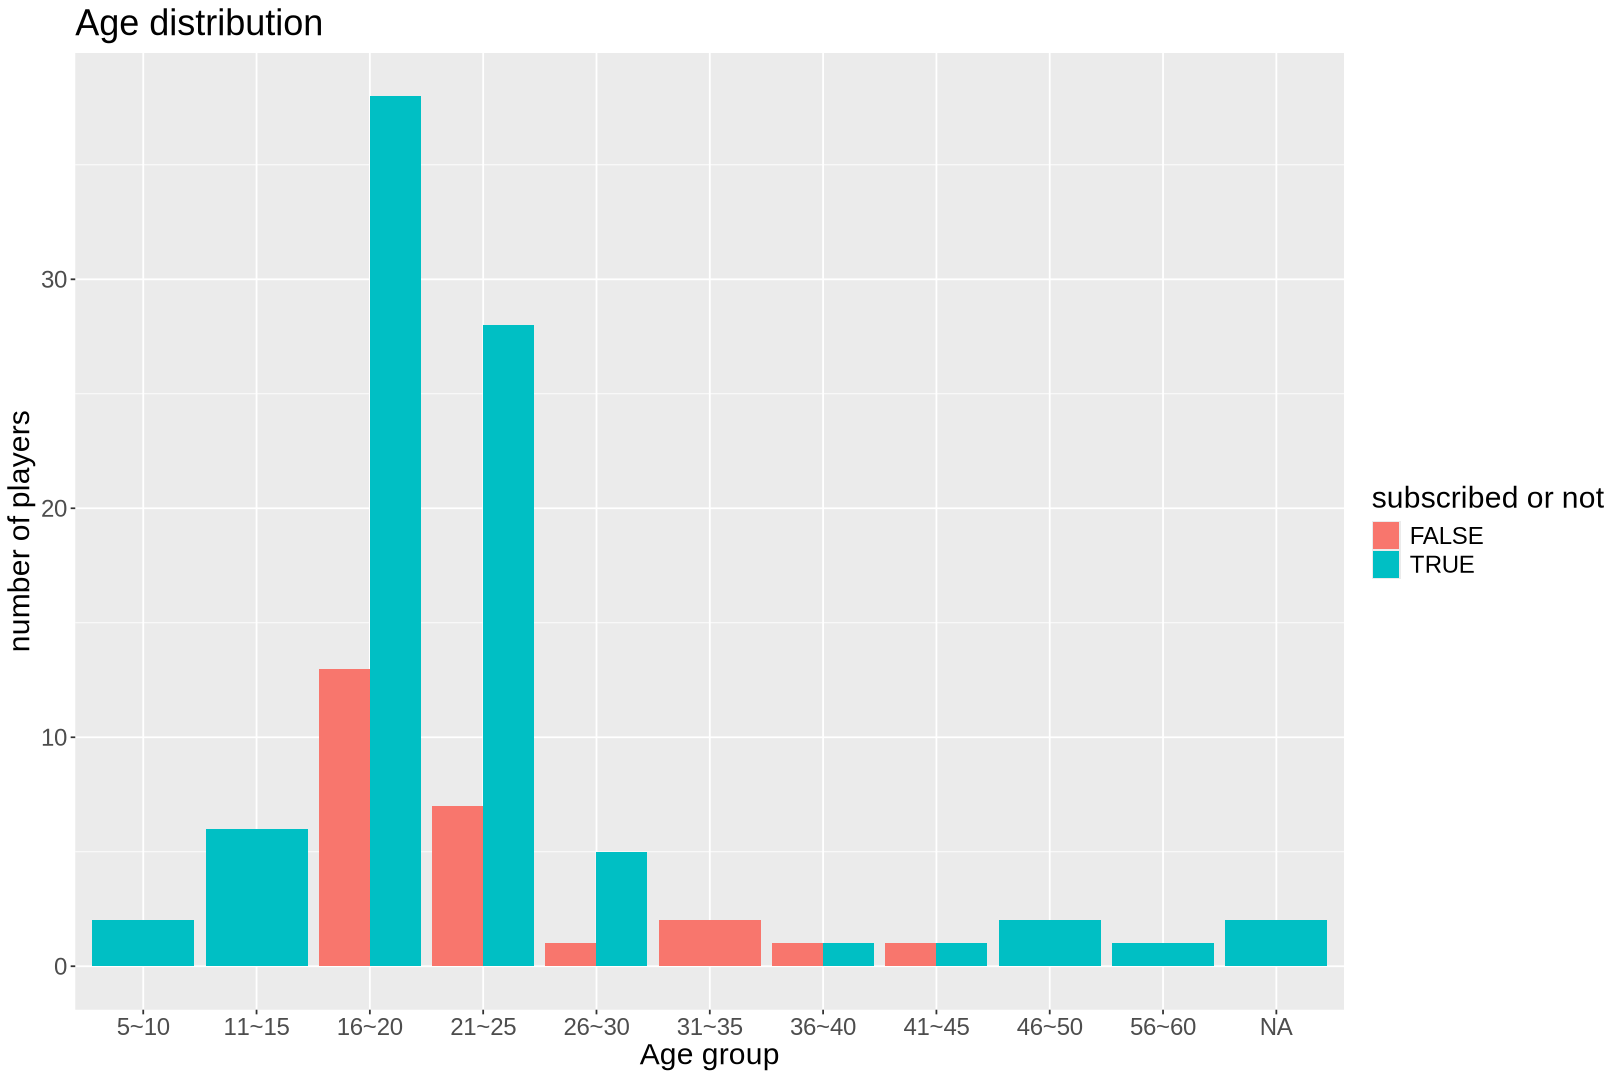

In [67]:
options(repr.plot.height = 9, repr.plot.width = 13.5)
age_dis <- players_age |>
ggplot(aes(x = age_group, fill = subscribe))+
geom_bar(position="dodge") +
labs(x="Age group", y="number of players", fill= "subscribed or not", title="Age distribution")+
theme(text=element_text(size=18))
age_dis